In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pickle

In [21]:
df = pd.read_csv("data/cleaned_data.csv")

In [22]:
# print(df.columns)
# del df['AMH(ng/mL)']
# del df['Unnamed: 42'] #All NaN value 
# del df['Marraige Status (Yrs)'] #1 NaN value 
# del df['Fast food (Y/N)'] #1 NaN value 

# # print(df.isna().sum())

# var = 0
# for cols in df.columns:
#     try:
#         df[cols] = df[cols].astype(float)
#         print(df[cols].isnull())
#         var += 1
#     except:
#         print(var)
#         break

# train = df.sample(frac=0.50,random_state=42) #random state is a seed value
# test = df.drop(train.index)

In [23]:
# X_train = train.iloc[:,[var for var in range(2,df.shape[1])]].values
# y_train = train.iloc[:,2].values

# X_test = test.iloc[:,[var for var in range(2,df.shape[1])]].values
# y_test = test.iloc[:,2].values

In [24]:
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values

In [25]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
#Using pickle operation to serialize Logistic regression and save the serialized format to a file
# filename = 'finalized_naive_bayes.sav'
# pickle.dump(gnb, open(filename, 'wb'))

# loaded_model = pickle.load(open(filename, 'rb'))
# y_pred = loaded_model.predict(X_test)

In [28]:
y_pred = gnb.predict(X_test) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 83.42857142857143


In [29]:
average_accuracy = 0
max = 0
for var in range(0,542):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=var)
    
    gnb = GaussianNB() 
    gnb.fit(X_train, y_train)
    
    y_pred = gnb.predict(X_test) 
    score = metrics.accuracy_score(y_test, y_pred)*100
    if (max < score):
        max = score
    average_accuracy += score
    
print(average_accuracy/542)
print (max)

83.33895624670537
91.42857142857143


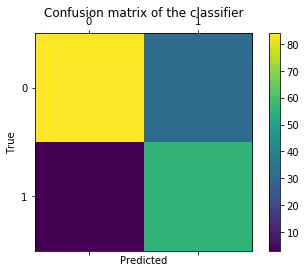

In [33]:
#Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix of the classifier') 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()